<a href="https://colab.research.google.com/github/kumkumbalyan/Credit-Card-Default-Prediction/blob/main/CreditCard_Default_Prediction_capstoneproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**"CREDIT CARD DEFAULT PREDICTION CLASSIFICATION PROJECT"**-


## **Breakdown of this Notebook:**
*   **Problem Description**
*   **Preparation**
   *  **Importing Packages and Loading Data**
*   **Exploratory Data Analysis (EDA)**
   *  Data Overview and Cleaning
   *  Checking null values
   *  Dropping null values
   *  Dropping few columns
   *  Checking the duplicates and their sum
   *  Bivariate Analysis
   *  Data Analysis and Visualization
   *  The Relationship Between the Variables and Default
   *  Correlation Between the Variables
   
*   **Feature Engineering**
   *  Adding New Features
   *  One hot encoding
   *  Feature Selection,Splitting and Balancing the Data

*   **Handling Data Imbalance**
   *  Synthetic Minority Oversampling Technique (SMOTE)
*   **Hyperparameter Tuning**
*   **Cross Validation**
*   **Evaluation Matrix used: CONFUSION MATRIX**

   **Machine Learning Classification Models used**: We have used 4 types of Models in this project:

  *   **LOGISTIC REGRESSION**. 
  *   **RANDOM FOREST**  
  *   **XG BOOST** 
  *   **DECISION TREE**


*  **Comparison of Model Performance**

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Importing Neccessary Modules and Loading Dataset**

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

##Mounting and importing the dataset from google drive

In [ ]:
#let's mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#let's load the credit_card_default_prediction data set from drive
card_df = pd.read_csv('/content/drive/MyDrive/credit_card_default_pred.-kanika raj/default_credit_card.csv',encoding = 'latin')

# **Exploring and Understanding the Dataset**

In [ ]:
# View top five rows of the dataset..
card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# View bottom five rows of the dataset..
card_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


# Data Overview and Cleaning:

## Renaming the columns for better understanding..

In [ ]:
# Simplifying column names and bringing consistency
card_df.rename(
    columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR','BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR', "SEX":"GENDER","default payment next month":"default_payment_next_month"}, inplace=True
)


In [ ]:
#checking columns names
card_df.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default_payment_next_month'],
      dtype='object')

##summary of dataset.

In [ ]:
# Checking the range of the numerical entries using the transpose view which makes it more reader-friendly.
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
GENDER,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_SEPT,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_AUG,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_JUL,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_JUN,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Even though the data description said that the minimum value of pay_sept was -1, all of them have a minimum value of -2. Also marriage has a minimum value of 0 but the description said the minimum value is 1. And education has a maximum value of 6 while it was supposed to have a maximum value of 4. we'll take a closer look later.

we notice that some of the bill_amnt's are negative. Although surprising, it is not uncommon to have a negative balance because of merchant refunds or overpayments. The values are a bit on the higher side and we'll take another look later.

In [ ]:
# Checking the shape of the dataset
card_df.shape

(30000, 25)

In [ ]:
#Checking details about the data set
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   GENDER                      30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_SEPT                    30000 non-null  int64
 7   PAY_AUG                     30000 non-null  int64
 8   PAY_JUL                     30000 non-null  int64
 9   PAY_JUN                     30000 non-null  int64
 10  PAY_MAY                     30000 non-null  int64
 11  PAY_APR                     30000 non-null  int64
 12  BILL_AMT_SEPT               30000 non-null  int64
 13  BILL_AMT_AUG                30000 non-null  int64
 14  BILL_A

In [ ]:
#Checking the Unique the values
card_df.nunique()

ID                            30000
LIMIT_BAL                        81
GENDER                            2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_SEPT                         11
PAY_AUG                          11
PAY_JUL                          11
PAY_JUN                          11
PAY_MAY                          10
PAY_APR                          10
BILL_AMT_SEPT                 22723
BILL_AMT_AUG                  22346
BILL_AMT_JUL                  22026
BILL_AMT_JUN                  21548
BILL_AMT_MAY                  21010
BILL_AMT_APR                  20604
PAY_AMT_SEPT                   7943
PAY_AMT_AUG                    7899
PAY_AMT_JUL                    7518
PAY_AMT_JUN                    6937
PAY_AMT_MAY                    6897
PAY_AMT_APR                    6939
default_payment_next_month        2
dtype: int64

So there are two unique values in Target/Dependent variable that is 0&1 whereas 0- represents Non-default and 1- represents Default value.

# **Features Description**

We have records of 30000 customers. Below are the description of all features:

    ID: ID of each client

    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

    SEX: Gender (1 = male, 2 = female)

    EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

    MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

    AGE: Age in years


Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

    PAY_0: Repayment status in September, 2005 (scale same as above)

    PAY_2: Repayment status in August, 2005 (scale same as above)

    PAY_3: Repayment status in July, 2005 (scale same as above)

    PAY_4: Repayment status in June, 2005 (scale same as above)

    PAY_5: Repayment status in May, 2005 (scale same as above)

    PAY_6: Repayment status in April, 2005 (scale same as above)

    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

    default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset, we got customer credit card transaction history for past 6 months, on basis of which we have to predict if cutomer will default or not.

# **Preprocessing the dataset**

## Handling Missing / Null / Duplicate Values.
The cause of missing values can be data corruption or failure to record data. The handling of missing/Null/Duplicate data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

In [ ]:
# Checking null values
card_df.isnull().sum()


ID                            0
LIMIT_BAL                     0
GENDER                        0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_SEPT                      0
PAY_AUG                       0
PAY_JUL                       0
PAY_JUN                       0
PAY_MAY                       0
PAY_APR                       0
BILL_AMT_SEPT                 0
BILL_AMT_AUG                  0
BILL_AMT_JUL                  0
BILL_AMT_JUN                  0
BILL_AMT_MAY                  0
BILL_AMT_APR                  0
PAY_AMT_SEPT                  0
PAY_AMT_AUG                   0
PAY_AMT_JUL                   0
PAY_AMT_JUN                   0
PAY_AMT_MAY                   0
PAY_AMT_APR                   0
default_payment_next_month    0
dtype: int64

So it is clear from above info that there are no missing values in the dataset.

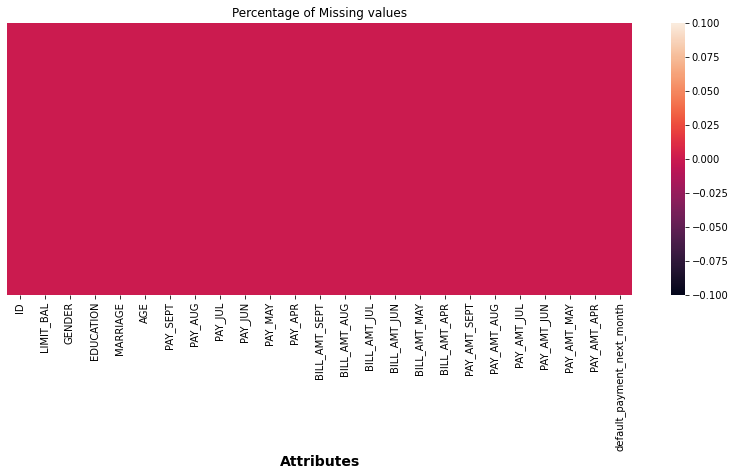

In [ ]:
#missing value plot
plt.figure(figsize=(14, 5))
sns.heatmap(card_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Attributes", size=14, weight="bold")
plt.title("Percentage of Missing values")
plt.show()

Above HEATMAP plot shows that there are no missing values present in the dataset.

##Checking and removing Duplicate values.

In [ ]:
# Checking Duplicate Values.
duplicates=len(card_df[card_df.duplicated()])
print("The number of duplicate values in the data set is = ",duplicates)

The number of duplicate values in the data set is =  0


# **Exploratory Data Analysis Of The Data Set**

**Dependent Variable**

## 'Distribution of defaulters vs non-defaulters'

Text(0.5, 1.0, 'Distribution of defaulters vs non-defaulters')

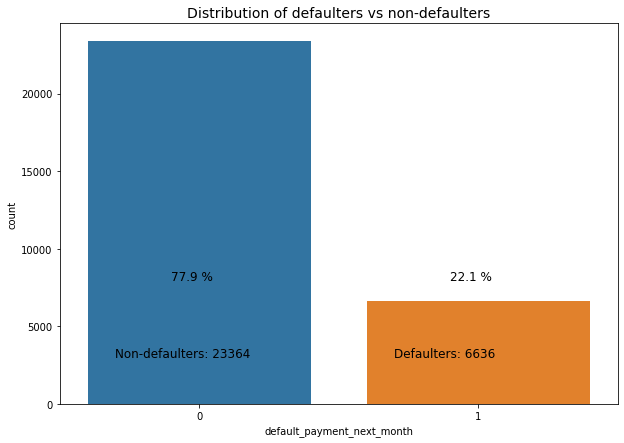

In [ ]:
#Getting the frequency of defaults
defs = card_df["default_payment_next_month"].sum()
non_defs = len(card_df) - defs

# Percentage calculation of defaults
def_perc = round(defs / len(card_df) * 100, 1)
non_def_perc = round(non_defs / len(card_df) * 100, 1)

#Graph parameters
plt.figure(figsize=(10, 7))
# sns.set_context('notebook', font_scale=1.2)
sns.countplot(x="default_payment_next_month", data=card_df)  # ,palette="Blues"
plt.annotate(
    "Non-defaulters: {}".format(non_defs),
    xy=(-0.3, 15000),
    xytext=(-0.3, 3000),
    size=12,
)
plt.annotate(
    "Defaulters: {}".format(defs), xy=(0.7, 15000), xytext=(0.7, 3000), size=12
)
plt.annotate(str(non_def_perc) + " %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(def_perc) + " %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title("Distribution of defaulters vs non-defaulters", size=14)

The above bar plot displaying the number and percentage of Default vs Non default values. so we can conclude that, Defaulters are less as compare to the Non-Defaulters in the given dataset.

Here:
*    0- Non-default
*    1-  Deafult

In [ ]:
#checking count values for default and non default.
card_df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

**Independent Variable**

* Here we will do **Bivariate analysis** i.e performed to find the relationship between each variable in the dataset and the target variable of interest.

# **The relationship Between the Variables and Default**
we will study the relationship between the features and credit card default. Although this is not definitive, it will give us a good understanding of the data. This will also help us to make decisions about some of the features having values different than what was provided in the data description.

**creating a function which quantifies and displays the distribution of default across the various classes of a feature.**
    

In [ ]:
#creating function which display distribution across various classes.
def compare_default_across_features(df, col_name, dict_label={}):
    """
    This function quantifies and displays the distribution of default across the various classes of a feature.
    
    INPUT:
    - df - (pd.DataFrame) the dataframe
    - col_name - (str) the column name of the feature being considered
    - dict_label - (dictionary) a dictionary relating the values of the column to what they represent
    
    OUTPUT:
    - Displays a bar plot showing the population distribution by feature values
    - Displays and returns a cross-tab showing the rate of default across each feature value
    - Displays a bar plot showing the population distribution and default by the feature values 
    """

    # Create a cross-tab and rename indices for readability
    cross_tab = pd.crosstab(df["default_payment_next_month"], df[col_name], margins=True, normalize=False)

    new_index = {0: "Non-default proportion", 1: "Default proportion"}
    new_columns = dict_label

    cross_tab.rename(index=new_index, columns=new_columns, inplace=True)

     # Plot a bar graph showing population distribution by the feature values
    plt.figure(figsize=(10, 5))
    i = cross_tab.shape[1] - 1
    cross_tab.loc["All"][0:i].plot.bar(rot=30, fontsize=14)
    plt.title("Population Distribution By " + col_name, fontsize=20)
    plt.ylabel("count")
    plt.show()
    print(end=" \n ")

    # Normalise the cross-tab and print it
    cross_tab_norm = cross_tab / cross_tab.loc["All"]
    display(cross_tab_norm)
    print(end=" \n ")

    # Plot a bar graph showing population distribution by the feature values separating the defaulters and non-defaulters
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col_name, hue="default_payment_next_month", data=card_df)
    plt.title(
        "Population Distribution By " + col_name + " with default and non-default",
        fontsize=20,
    )

    # Return the normalised cross-tab
    return cross_tab_norm

# **Is default proportion affected by Gender?**

In [ ]:
#checking the values of Gender
card_df['GENDER'].value_counts()

2    18112
1    11888
Name: GENDER, dtype: int64

Here Male is representing 1 and Female is representing 2 so it's very clear that number of female are higher than Male in the given dataset. 

<Figure size 864x576 with 0 Axes>

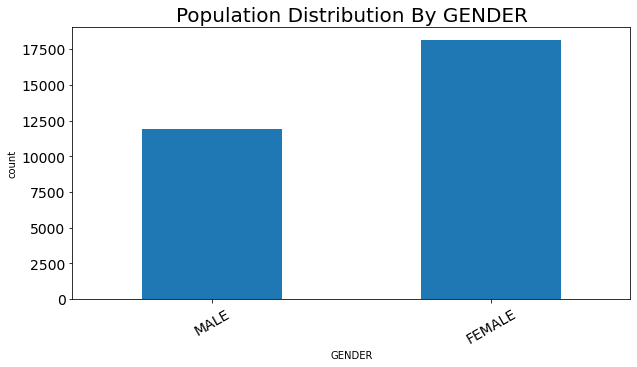

GENDER,MALE,FEMALE,All
default_payment_next_month,,,
Non-default proportion,0.758328,0.792237,0.7788
Default proportion,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


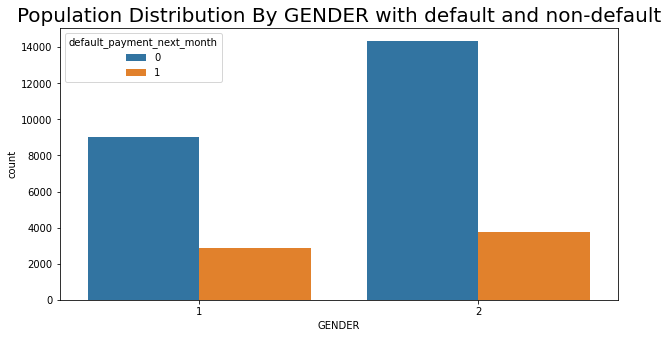

In [ ]:
#Bar graph describing Gender with their default and non default value
plt.figure(figsize=(12, 8))
gender_wise = compare_default_across_features(card_df, 'GENDER', {1 : 'MALE', 2 : 'FEMALE'})

From above analysis its clear that  there are more female credit card holders that's why this category contains more non-default values as compare to male but when we compare default proportion value then its higher among male.

# **Is default proportion affected by education?**

In [ ]:
#calculating the education values
card_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
#rearranging the education category,here 4,5,6 now comes under 'others' category i.e 0
card_df["EDUCATION"] = card_df["EDUCATION"].replace({4:0,5:0,6:0})
card_df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

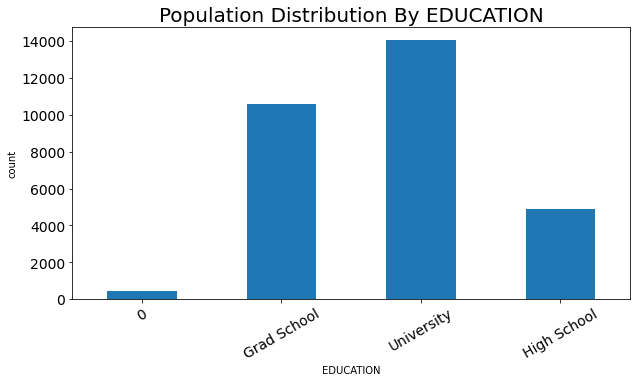

EDUCATION,0,Grad School,University,High School,All
default_payment_next_month,,,,,
Non-default proportion,0.929487,0.807652,0.762651,0.748424,0.7788
Default proportion,0.070513,0.192348,0.237349,0.251576,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


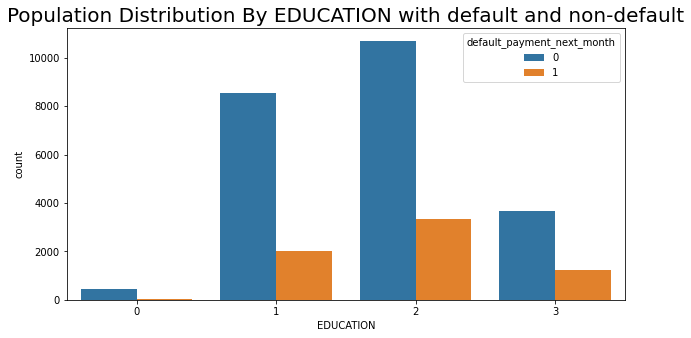

In [ ]:
# defining 'education' category
edu= compare_default_across_features(
   card_df,
    "EDUCATION",
    {
        0: "0",
        1: "Grad School",
        2: "University",
        3: "High School",
        4: "0",
        5: "5",
        6: "6",
    },
)

A quick glance shows that the default proportion decreases with higher education level. This would agree because more educated people tend to have higher paying jobs which might make it easier for them to pay back their debts.

As we mentioned earlier, we notice that there are education categories with values 0, 5 and 6 which are not explained by the data description. I could either drop those data points, keep them or merge them with another cluster. Since there is an Others category, I will cluster them with that category.

# **Is default proportion affected by marital status?**

In [ ]:
#calculating marriage value count
card_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
#rearranging marriage category
card_df["MARRIAGE"] = card_df["MARRIAGE"].replace({0:3})
card_df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

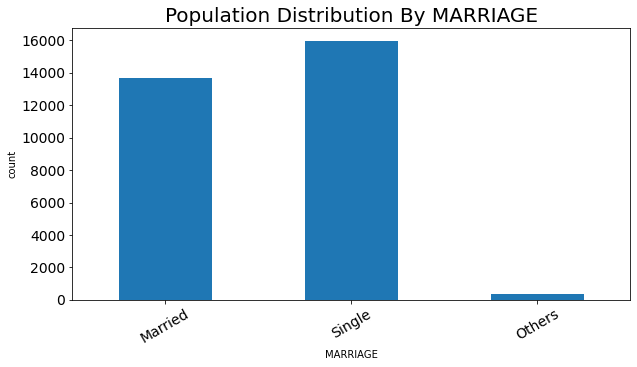

MARRIAGE,Married,Single,Others,All
default_payment_next_month,,,,
Non-default proportion,0.765283,0.790717,0.763926,0.7788
Default proportion,0.234717,0.209283,0.236074,0.2212
All,1.000000,1.000000,1.000000,1.0000


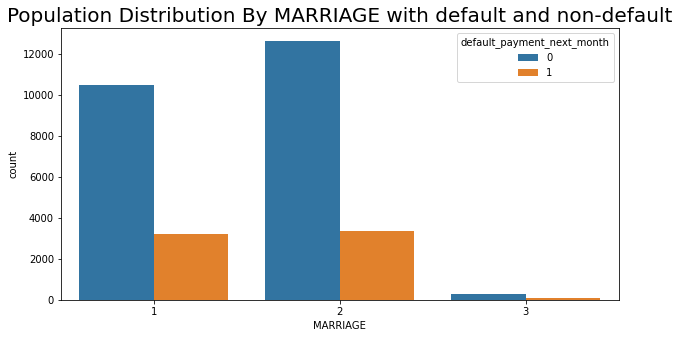

In [ ]:
#defining 'marriage' category
mrg= compare_default_across_features(card_df, 'MARRIAGE', {0:'0', 1:'Married', 2:'Single', 3:'Others'})

Married people have higher default proportions than single folks. While there are intuitive arguments for and against it, closer inspection is needed. For example, is there a difference between married men and married women?

Also, we notice that there is a marriage category with value 0. Like earlier, since there is an Others category, we will cluster these points with that category. (This is done a bit later.)



# **Is the proportion of defaults correlated with age?**

Since age is a discrete variable, we have to figure out a way to bin the values. There are several ways to do this (including using the frequency and quantiles) but we will choose a simpler and more intuitive way by rounding their age to the lowest multiple of 10.

In [ ]:
#calculating AGE value count
card_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [ ]:
# Creating the AGE bins
card_df['AGE'] = card_df['AGE']//10
age_group_names = [str(i) + '0s' for i in range(2,8)]
age_dict = dict(zip(range(2,8), age_group_names))
#cc_df['age_bin'] = pd.cut(X['age'], 6, labels=age_group_names)

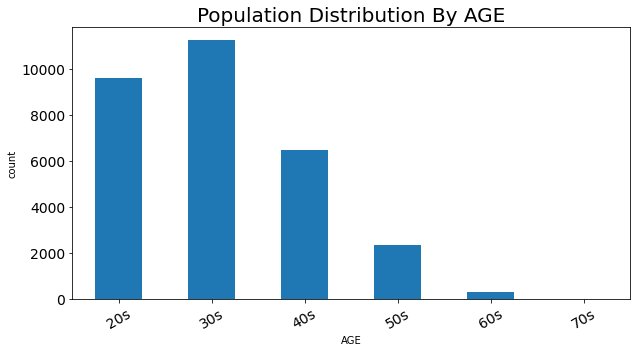

AGE,20s,30s,40s,50s,60s,70s,All
default_payment_next_month,,,,,,,
Non-default proportion,0.771574,0.797473,0.770266,0.751388,0.716561,0.72,0.7788
Default proportion,0.228426,0.202527,0.229734,0.248612,0.283439,0.28,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0000


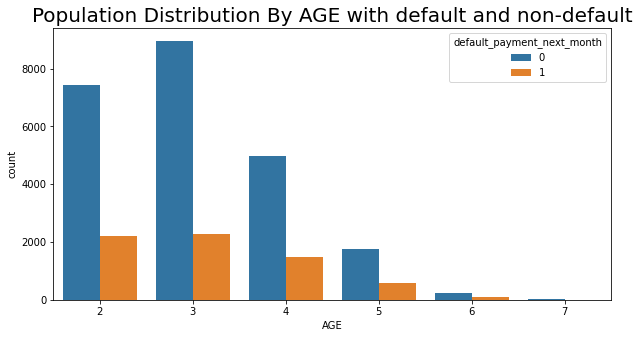

In [ ]:
#Bar graph representing age group
age_cross_tab = compare_default_across_features(card_df, 'AGE', age_dict)

Although there is no monotonic trend in the default rate, there is some change. we look closer into the numeric values. It is easy to see that default value is lowest for people in their 40s&50s and then steadily decreases with age.

# **Is the default proportion affected by credit limit?**

In [ ]:
#checking the shape of LIMIT_BAL
card_df['LIMIT_BAL'].shape

(30000,)

In [ ]:
#summary of limit_bal
card_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

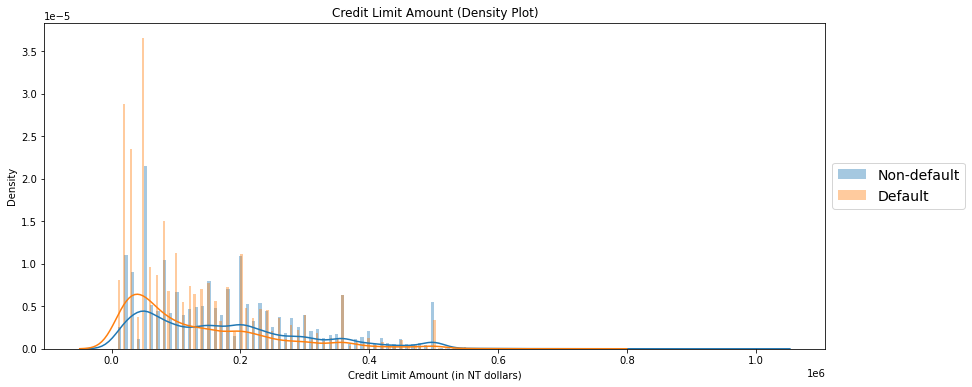

In [ ]:
#Instead of binning the credit limits, we try to see if we can analyse any trends from a density plot.

card_def0 = card_df.loc[card_df['default_payment_next_month'] == 0]["LIMIT_BAL"]
card_def1 = card_df.loc[card_df['default_payment_next_month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
sns.distplot(card_def0,kde=True,bins=200,label="Non-default")
sns.distplot(card_def1,kde=True,bins=200,label="Default")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)
plt.title('Credit Limit Amount (Density Plot)')
plt.xlabel('Credit Limit Amount (in NT dollars)')
plt.show()

Looking at the density plot, it seems that people with higher credit limit have significantly lower default proportion. Again, intuitively that is not surprising because the people who have higher credit limits must have displayed long periods of fiscal responsibility to reach that place.

# **Is the default proportion affected by history of past repayment status?**

We would expect this to be very closely related to the default proportion. The box plots show that payment history in the two most recent months pay_1 and pay_2 is positively correlated to default.

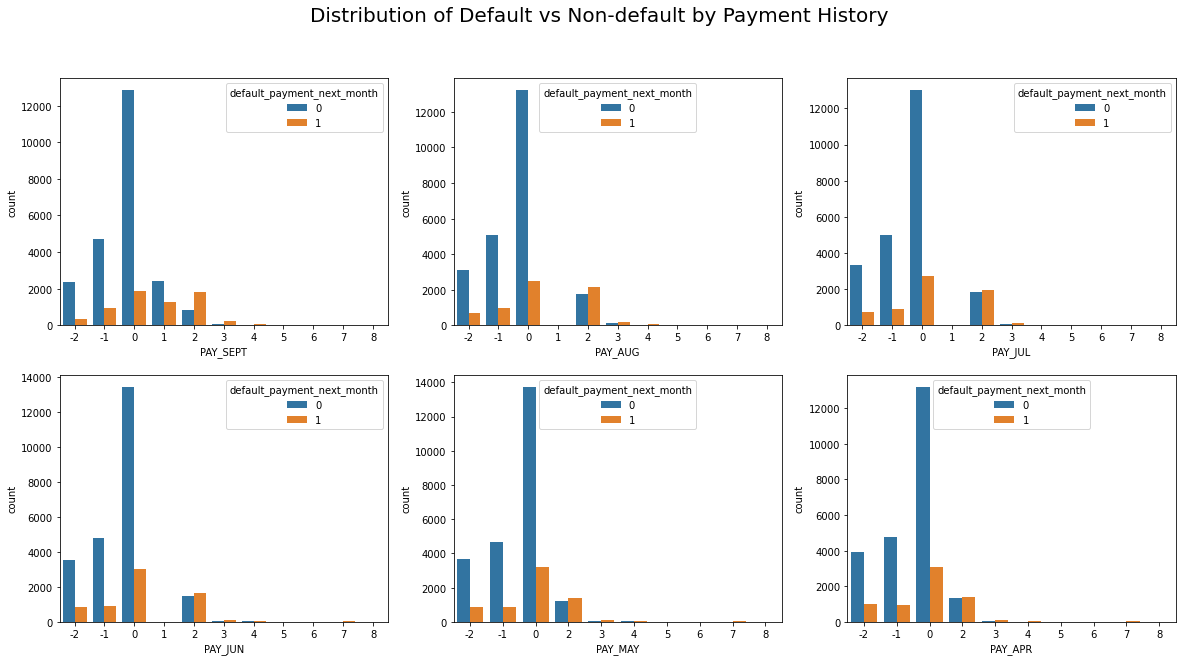

In [ ]:
#Box plot displaying default with payment history
pay_hist = card_df[['PAY_SEPT', 'PAY_AUG', 'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR', 'default_payment_next_month']]

f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('Distribution of Default vs Non-default by Payment History', size=20)
sns.countplot(x='PAY_SEPT', hue="default_payment_next_month", data=pay_hist, ax=axes[0,0])
sns.countplot(x="PAY_AUG", hue="default_payment_next_month", data=pay_hist, ax=axes[0,1])
sns.countplot(x="PAY_JUL", hue="default_payment_next_month", data=pay_hist, ax=axes[0,2])
sns.countplot(x="PAY_JUN", hue="default_payment_next_month", data=pay_hist, ax=axes[1,0])
sns.countplot(x="PAY_MAY", hue="default_payment_next_month", data=pay_hist, ax=axes[1,1])
sns.countplot(x="PAY_APR", hue="default_payment_next_month", data=pay_hist, ax=axes[1,2])

As remarked earlier, we notice that if the person has defaulted for 2 months or more in the past two months, there is a very high chance of them defaulting.

A remark about the values of the payment history features. The data description mentioned that it would be taking values -1 and 1 to 9. However, we see that it takes values from -2 to 8, which is surprising.

**Default with Completed / Paid Amount**

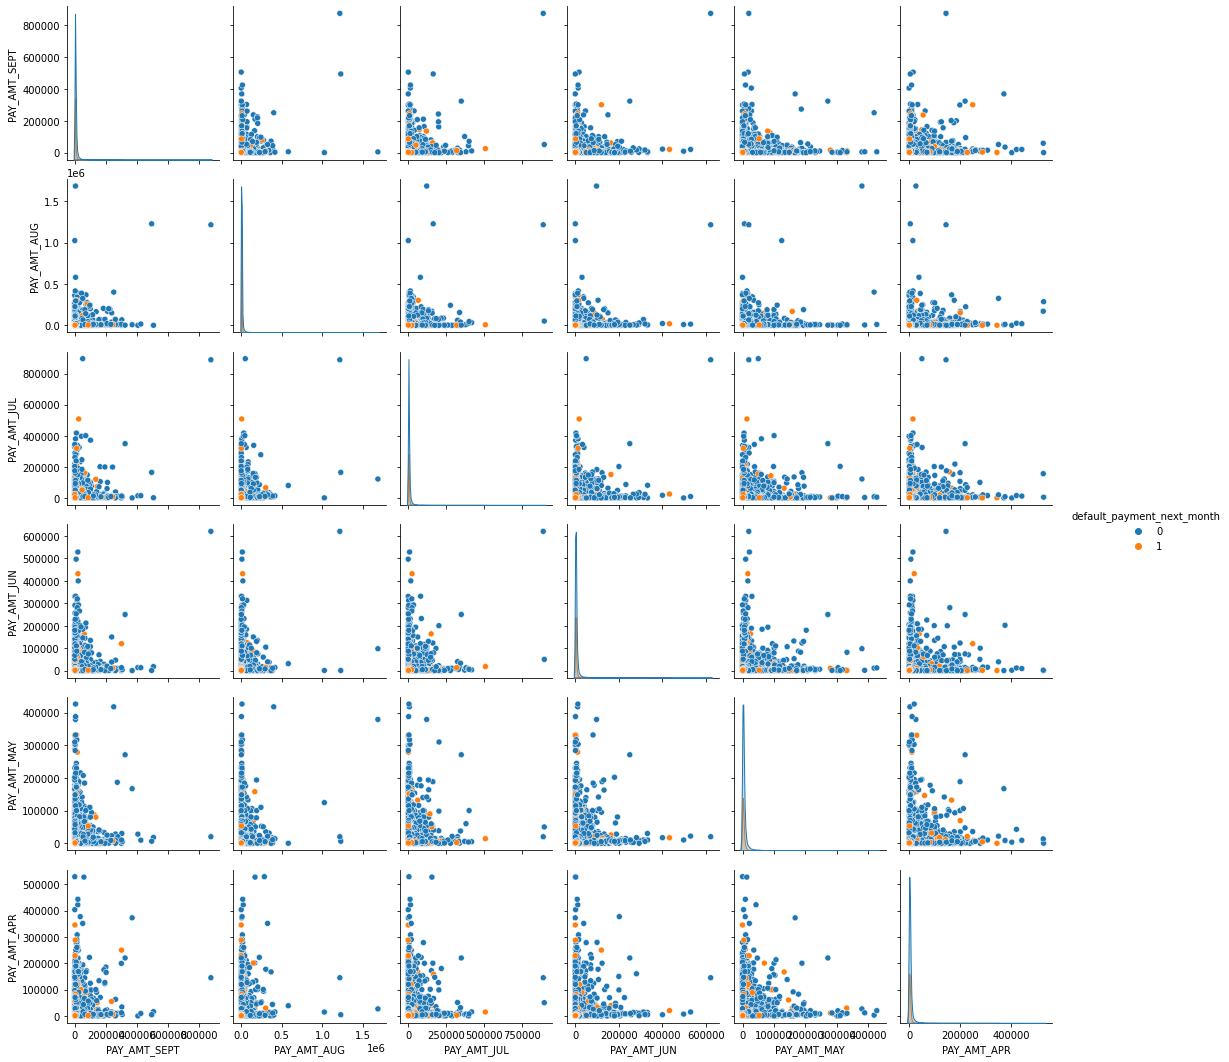

In [ ]:
#using pair plot to describe all the paid amount values with default and non default month wise
pay_amnt_df = card_df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR','default_payment_next_month']]
sns.pairplot(data = pay_amnt_df,kind='scatter',hue='default_payment_next_month')

**Defaults with Total Bill Amount**

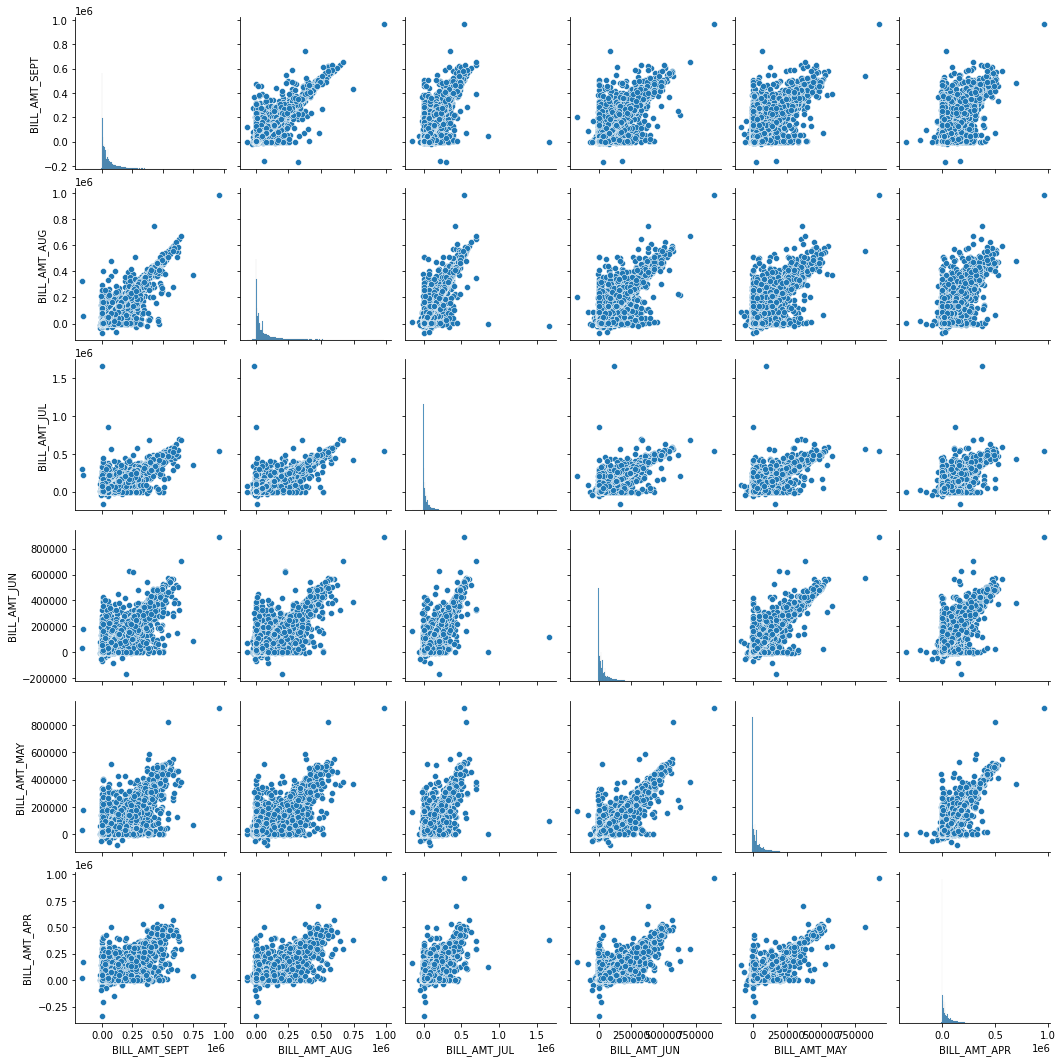

In [ ]:
# bill amount density plots and their scatter plots
bill_amnt_df = card_df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
sns.pairplot(data = bill_amnt_df)

Above pair plot is discribing the distribution of all bill amount month wise of default categories.

# **Correlation Heatmap**

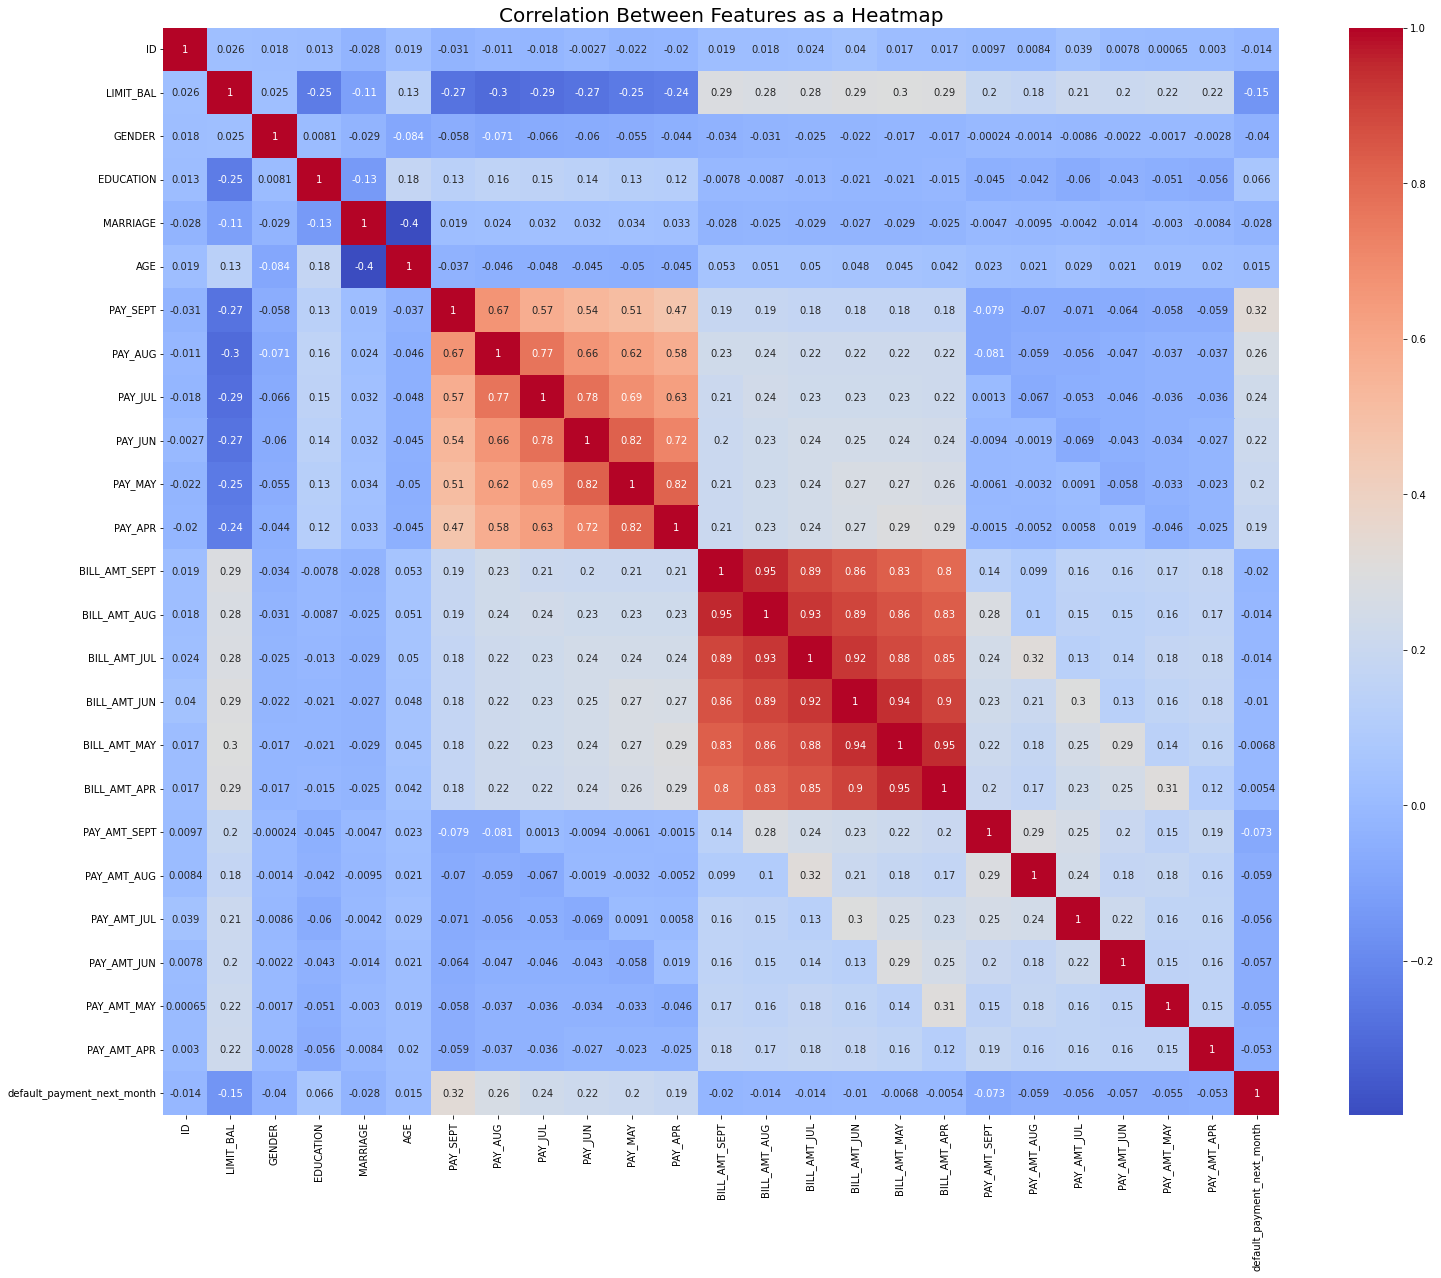

In [ ]:
#Correlation Between Features as a Heatmap
plt.figure(figsize=(25,20))
sns.heatmap(card_df.corr(),annot=True,cmap="coolwarm")
plt.title('Correlation Between Features as a Heatmap', size=20);
plt.show()

What stands out are the high correlation among the payment history features and the bill amount features. we will keep this in mind as we build my models.

# SMOTE (Synthetic Minority Oversampling Technique)
* Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way.

In [ ]:
#applying SMOTE technique to handle imbalance data
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(card_df.iloc[:,0:-1], card_df['default_payment_next_month'])

print('Original shape of Dataset', len(card_df))
print('Resampled shape of Dataset', len(y_smote))

Original shape of Dataset 30000
Resampled shape of Dataset 46728


In [ ]:
#craeting list for default 
columns = list(card_df.columns)
columns.pop()

'default_payment_next_month'

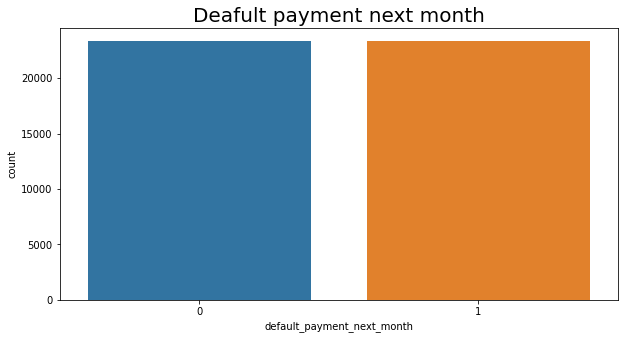

In [ ]:
#calculating the deafult value count after applying SMOTE technique
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['default_payment_next_month'] = y_smote
plt.figure(figsize=(10,5))
sns.countplot('default_payment_next_month', data = balance_df)
plt.title('Deafult payment next month', size=20);


So as we can see that after applying SMOTE technique,the above bar plot describing that deafault(1) and non-deafult(0) values are balanced or same now.

In [ ]:
#creating new dataset of dependent variable
balance_df[balance_df['default_payment_next_month']==1]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,2,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,2,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,3,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,2,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,3,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,18272,144586,2,2,1,3,0,0,0,0,...,78487,63475,70878,5568,4316,2258,3002,12202,1829,1
46724,3894,240000,1,1,1,2,0,0,-1,-1,...,230,230,230,0,230,230,230,230,503,1
46725,13876,50000,2,2,1,2,2,2,1,1,...,48680,47851,46443,1681,422,3442,1720,415,2928,1
46726,16361,389083,2,2,1,3,0,0,0,0,...,361925,329565,317530,18112,14343,12483,11453,10405,12133,1


# Feature Engineering

Based on our understanding of the data and conclusions from EDA, here engineering few features.

In [ ]:
#creating a copy of balanced dataset.
df_fr = balance_df.copy()

In [ ]:
#column names of new dataset
balance_df.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default_payment_next_month'],
      dtype='object')

In [ ]:
#adding all the six payment values and assigning it to a new variable
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']
df_fr.groupby('default_payment_next_month')['Payement_Value'].mean()

default_payment_next_month
0   -1.98014
1    1.68032
Name: Payement_Value, dtype: float64

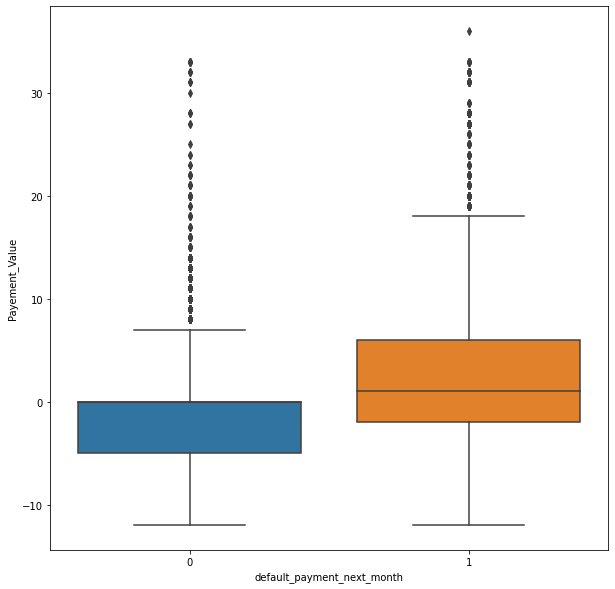

In [ ]:
#using box plot to display all the payment values with default and non default counts 
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'default_payment_next_month', y = 'Payement_Value')

Above box plot showing the count of all the six payment values for default and non default where as 0 - Non Default and 1 - Default.

**Calculating DUE amount.**

In [ ]:
#calculating the Dues amount by substracting Pay amount from bill amount.
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])
df_fr.groupby('default_payment_next_month')['Dues'].mean()

default_payment_next_month
0    187742.051532
1    195689.582649
Name: Dues, dtype: float64

In [ ]:
#printing unique values for education & marriage
print(df_fr['EDUCATION'].unique())
print(df_fr['MARRIAGE'].unique())

[2 1 3 0]
[1 2 3]


In [ ]:
#creating dictionary for Gender,marriage and education
df_fr.replace({'GENDER': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
#describing the new dataset
df_fr.describe()

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,Payement_Value,Dues
count,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,...,46728.000000,46728.000000,4.672800e+04,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,4.672800e+04
mean,14910.600004,154067.439287,2.969633,0.169128,0.038628,-0.011920,-0.070450,-0.121148,-0.154147,50139.643897,...,38831.402799,4758.483265,4.893196e+03,4424.866868,4167.975710,4071.904276,4467.751412,0.500000,-0.149910,1.917158e+05
std,8426.659309,125873.283115,0.921002,1.112446,1.208941,1.206097,1.200599,1.169969,1.182717,73717.150984,...,59784.958506,14103.318705,1.936053e+04,15347.792987,13947.087578,13259.700331,15732.211488,0.500005,6.034908,3.000568e+05
min,1.000000,10000.000000,2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-2.848257e+06
25%,7730.750000,50000.000000,2.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3340.750000,...,1289.000000,617.000000,5.800000e+02,346.750000,264.000000,240.000000,194.000000,0.000000,-4.000000,2.335750e+03
50%,14910.500000,120000.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21362.000000,...,17603.500000,2000.000000,1.956000e+03,1538.000000,1276.000000,1310.000000,1279.000000,0.500000,0.000000,8.371550e+04
75%,22053.250000,220000.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63678.500000,...,48590.500000,4494.000000,4.220250e+03,3822.000000,3500.000000,3500.000000,3500.000000,1.000000,2.000000,2.392205e+05
max,30000.000000,1000000.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,36.000000,3.132149e+06


In [ ]:
#top 10 data of new dataset
df_fr.head(10)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,Payement_Value,Dues
0,1,20000,FEMALE,university,married,2,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,2,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,3,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,3,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,5,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620
5,6,50000,MALE,graduate school,single,3,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,0,173273
6,7,500000,MALE,graduate school,single,2,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,0,2131813
7,8,100000,FEMALE,university,single,2,0,-1,-1,0,...,567,380,601,0,581,1687,1542,0,-3,8315
8,9,140000,FEMALE,high school,married,2,0,0,2,0,...,3719,3329,0,432,1000,1000,1000,0,2,44355
9,10,20000,MALE,high school,single,3,-2,-2,-2,-2,...,13912,0,0,0,13007,1122,0,0,-10,12790


Having engineered the features, we analyzed taht some of the aggregated columns are correlated with default.

# **One Hot Encoding**

The original dataset had three categorical demographic variables (sex, marriage and education). Among them education has an ordinal structure as the changes in value lead to more or less education.We will now one-hot-encode the marriage,education and sex/gender variable.

In [ ]:
#creating dummy datset
df_fr = pd.get_dummies(df_fr, columns=['EDUCATION','MARRIAGE'])

One-Hot_encoding the education and marriage column and dropping the first column

In [ ]:
#encoding education and marriage categories
df_fr.drop(['EDUCATION_0','MARRIAGE_others'],axis = 1, inplace = True)

In [ ]:
# LABEL ENCODING FOR Gender
encoders_nums = {
                 "GENDER":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [ ]:
#Checking and then dropping the entries of the ID column
print(df_fr["ID"].value_counts())
df_fr.drop(["ID"], axis=1, inplace=True)

17817    6
15406    6
6465     6
19460    6
4843     6
        ..
12450    1
12449    1
12442    1
12441    1
30000    1
Name: ID, Length: 30000, dtype: int64


The **ID** entries are unique for every row and seem to serve the purpose of a serial number,will drop that variable.

In [ ]:
#checking the info of new dataset
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46728 entries, 0 to 46727
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   46728 non-null  int64
 1   GENDER                      46728 non-null  int64
 2   AGE                         46728 non-null  int64
 3   PAY_SEPT                    46728 non-null  int64
 4   PAY_AUG                     46728 non-null  int64
 5   PAY_JUL                     46728 non-null  int64
 6   PAY_JUN                     46728 non-null  int64
 7   PAY_MAY                     46728 non-null  int64
 8   PAY_APR                     46728 non-null  int64
 9   BILL_AMT_SEPT               46728 non-null  int64
 10  BILL_AMT_AUG                46728 non-null  int64
 11  BILL_AMT_JUL                46728 non-null  int64
 12  BILL_AMT_JUN                46728 non-null  int64
 13  BILL_AMT_MAY                46728 non-null  int64
 14  BILL_A

In [ ]:
#checking the shape after revoming ID column
df_fr.shape

(46728, 29)

# **Machine Learning: Classification Models**

**Scaling,Splitting,tuning and Balancing the Data**

# Logistic Regression Model

* It is used in statistical software to understand the relationship between the dependent variable and one or more independent variables by estimating probabilities using a logistic regression equation. This type of analysis can help us in predicting the likelihood of an event happening or a choice being made.

In [ ]:
#Creating copy of dataset for logistic model
df_log_reg = df_fr.copy()

In [ ]:
#assigning default_payment_next_month value to Y variable
X = df_log_reg.drop(['default_payment_next_month'],axis=1)
y = df_log_reg['default_payment_next_month']

In [ ]:
#column feature
columns = X.columns

In [ ]:
#scaling and fitting the variable
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#splitting data in train and test set with random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
#importing logistic regression model with max iteration value
#from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
#train_preds = clf.predict_proba(X_train)[:,1]
#test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

**Logistic Regression Model Evaluation**

In [ ]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7316893985370684
The accuracy on test data is  0.7305622203488749


In [ ]:
#Generating Classification Report
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7305622203488749
The precision on test data is  0.7352788586251622
The recall on test data is  0.7283823718360529
The f1 on test data is  0.731814367778997
The roc_score on test data is  0.7305829115006397


[[11499  4154]
 [ 4246 11408]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

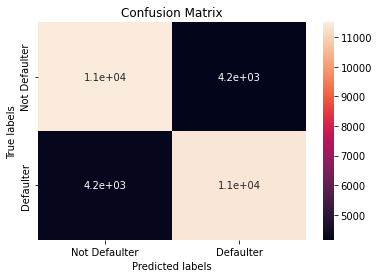

In [ ]:
# applying the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Receiver operating characteristic curve(ROC) and Area Under the Curve (AUC)**.

**AUC-ROC** curve helps us visualize how well our machine learning classifier is performing.

In [ ]:
#getting the predicted probabilities 
y_preds_proba_lr = clf.predict_proba(X_test)[::,1]

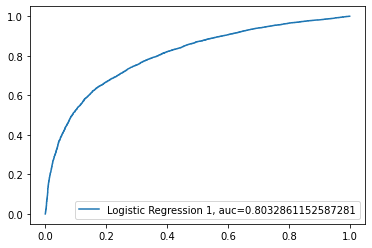

In [ ]:
#visualizing ROC-AUC curve
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The model is performing markedly better. Further, the most important features include the payment history and some of the engineered features like usage, zero balance and the credit limit. This agrees with our intuition and the insights we had drawn from EDA.


# **Random-Forest Classifier**

* Random forests or random decision forests is an ensemble learning method for classification,and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees becomes our model’s prediction .

In [ ]:
##importing Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#assigning default column to y variable
X = df_fr.drop(['default_payment_next_month','Payement_Value','Dues'],axis=1)
y = df_fr['default_payment_next_month']

In [ ]:
#First create the base model to tune then Fit the random search model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

**Random Forest Model Evaluation**

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9978918452742198
The accuracy on test data is  0.8348356137734259


In [ ]:
#Classification Report
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The accuracy on train data is ", train_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8348356137734259
The accuracy on train data is  0.9978918452742198
The precision on test data is  0.8132295719844358
The recall on test data is  0.8499389995933306
The f1 on test data is  0.8311791608669716
The roc_score on test data is  0.8354617921885102


We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy which depicts that this is an untuned & overfitting dataset.However our f1-score is around 82%, which is not bad.

we will see if we can improve model performance by tuning the hyperparameters and try to fit the model.

#Hyperparameter Tuning The Random Forest Classifiers.
* Setting up a parameter grid for hyperparameter tuning

In [ ]:
#importing random forest libraries 
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
#giving the parameters for the grid
random_grid={'n_estimators': [200,400,600,800,1000],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [10,120,230,340,560],
               'min_samples_split': [2,5,10,4],
               'min_samples_leaf': [1,2,3,4,5,6,8],
              'criterion':['entropy','gini']}

In [ ]:
#First create the base model to tune then apply Randomized CV
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 560],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             8],
                                        'min_samples_split': [2, 5, 10, 4],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=100, verbose=2)

In [ ]:
#Checking the Best Parameters
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 120,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
#checking parameters after applying CV
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 560],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             8],
                                        'min_samples_split': [2, 5, 10, 4],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=100, verbose=2)

In [ ]:
#Instantiating the best model
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
#Getting the Accuracy
train_accuracy_rf_randomcv = accuracy_score(train_class_preds,y_train)
test_accuracy_rf_randomcv = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf_randomcv)
print("The accuracy on test data is ", test_accuracy_rf_randomcv)

The accuracy on train data is  0.9978918452742198
The accuracy on test data is  0.8348356137734259


In [ ]:
#Classification Report
test_accuracy_rf_randomcv = accuracy_score(test_class_preds,y_test)
test_precision_score_rf_randomcv = precision_score(test_class_preds,y_test)
test_recall_score_rf_randomcv = recall_score(test_class_preds,y_test)
test_f1_score_rf_randomcv = f1_score(test_class_preds,y_test)
test_roc_score_rf_randomcv = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf_randomcv)
print("The precision on test data is ", test_precision_score_rf_randomcv)
print("The recall on test data is ", test_recall_score_rf_randomcv)
print("The f1 on test data is ", test_f1_score_rf_randomcv)
print("The roc_score on test data is ", test_roc_score_rf_randomcv)

The accuracy on test data is  0.8348356137734259
The precision on test data is  0.8132295719844358
The recall on test data is  0.8499389995933306
The f1 on test data is  0.8311791608669716
The roc_score on test data is  0.8354617921885102


[[15609    44]
 [   22 15632]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

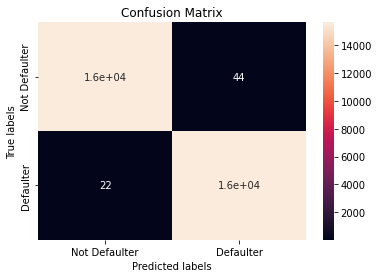

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ROC AUC curve

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
#predicted probabilities
y_preds_proba_rf = rf_clf.predict_proba(X_test)[::,1]

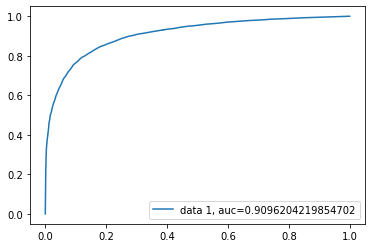

In [ ]:
#ROC AUC graph for Random Forest classifier
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The model correctly identifying more than half of the defaulters with high accuracy, precision and AUC_ROC score.

# **XG Boost**- XGBoost stands for Extreme Gradient Boosting.
* XGBoost is a tree based ensemble machine learning algorithm which is a scalable machine learning system for tree boosting.
* It uses more accurate approximations to find the best tree model.

In [ ]:
#importing XG boost library
import lightgbm as lgb 
import xgboost as xgb

In [ ]:
#splitting into train and test data set
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [ ]:
#defining the parameters
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [ ]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [ ]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=4, microseconds=560373)

In [ ]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest)

In [ ]:
#predictioning train and test class probability data
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

**XG Boost Model Evaluation**

In [ ]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.8154725780176957
The accuracy on test data is  0.7945010051228844


In [ ]:
#Classification report
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.7945010051228844
The precision on test data is  0.7507133592736706
The recall on test data is  0.8227434257285003
The f1 on test data is  0.7850796880298406
The roc_score on train data is  0.7967759580347725


Although this model is performing well but still we tune few hyperparameters to see the effect. 

# **Hyperparameter Tuning the XG boost**

In [ ]:
#importing XG Boost libraries
from xgboost import  XGBClassifier

In [ ]:
#Giving the values to X & Y
X = df_fr.drop(['default_payment_next_month','Payement_Value','Dues'],axis=1)
y = df_fr['default_payment_next_month']

In [ ]:
#splitting into train and test set and applying cv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
#Giving the Parameters
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [ ]:
#calculating best score
gsearch1.best_score_

0.825278796401507

In [ ]:
#get the estimator
optimal_xgb = gsearch1.best_estimator_optimal_xgb = gsearch1.best_estimator_

In [ ]:
#Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
#Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9493084613664675
The accuracy on test data is  0.8366513196290772


In [ ]:
#Classification Report
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8366513196290772
The precision on test data is  0.8068741893644618
The recall on test data is  0.8579506274996552
The f1 on test data is  0.8316289018113763
The roc_score on train data is  0.8378492427583955


[[15140   513]
 [ 1074 14580]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

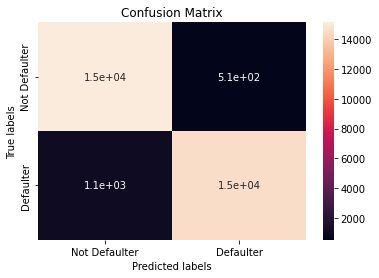

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**ROC AUC CURVE**

In [ ]:
#predicted probabilities
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

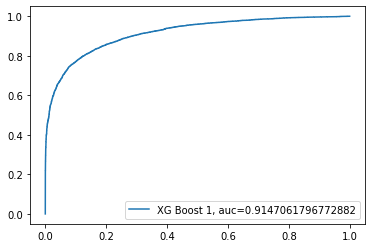

In [ ]:
#ROC AUC graph parameters of XG Boost
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="XG Boost 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

This model is now correctly identifying more than half of the defaulters with good accuracy, precision and AUC_ROC score so we can conclude that this model is performing better.

#**Decision Tree**
* The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In [ ]:
#importing decision tree model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#assigning default_payment_next_month to Y variable
X = df_fr.drop(['default_payment_next_month'],axis=1)
y = df_fr['default_payment_next_month']

In [ ]:
#splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
#Giving parameters to hypertune.
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
#applying grid search CV
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [ ]:
#getting the best score
grid_DTC_clf.best_score_

0.7220750765735479

In [ ]:
#getting max depth nd min sample for decision tree classifier
optimal_DTC_clf = grid_DTC_clf.best_estimator_
print(optimal_DTC_clf)

DecisionTreeClassifier(max_depth=20, min_samples_split=0.1)


In [ ]:
# Getting the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

**Decision Tree Model Evaluation**

In [ ]:
# Getting the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7226818283450985
The accuracy on test data is  0.7232993969262693


In [ ]:
#Classification Report
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)
test_precision_DTC = precision_score(test_class_preds,y_test)
test_recall_score_DTC = recall_score(test_class_preds,y_test)
test_f1_score_DTC = f1_score(test_class_preds,y_test)
test_roc_score_DTC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_DTC)
print("The precision on test data is ", test_precision_DTC)
print("The recall on test data is ", test_recall_score_DTC)
print("The f1 on test data is ", test_f1_score_DTC)
print("The roc_score on train data is ", test_roc_score_DTC)

The accuracy on test data is  0.7232993969262693
The precision on test data is  0.6785992217898833
The recall on test data is  0.7451929924512177
The f1 on test data is  0.7103387414296383
The roc_score on train data is  0.725096496225609


# **Hyperparameter Tuning the Decision Tree**

In [ ]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#assigning parameters
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
#giving values to X and Y
X = df_fr.drop(['default_payment_next_month'],axis=1)
y = df_fr['default_payment_next_month']

In [ ]:
#applying cv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [ ]:
#getting best score for this model
grid_DTC_clf.best_score_

0.7220750765735479

In [ ]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7226818283450985
The accuracy on test data is  0.7232993969262693


In [ ]:
#Classification Report
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)
test_precision_DTC = precision_score(test_class_preds,y_test)
test_recall_score_DTC = recall_score(test_class_preds,y_test)
test_f1_score_DTC = f1_score(test_class_preds,y_test)
test_roc_score_DTC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_DTC)
print("The precision on test data is ", test_precision_DTC)
print("The recall on test data is ", test_recall_score_DTC)
print("The f1 on test data is ", test_f1_score_DTC)
print("The roc_score on train data is ", test_roc_score_DTC)

The accuracy on test data is  0.7232993969262693
The precision on test data is  0.6785992217898833
The recall on test data is  0.7451929924512177
The f1 on test data is  0.7103387414296383
The roc_score on train data is  0.725096496225609


[[12039  3614]
 [ 5068 10586]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

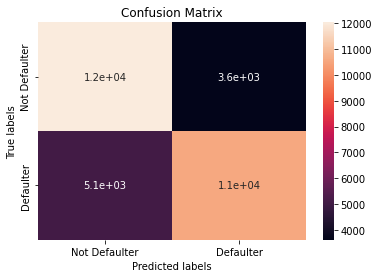

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**ROC AUC curve**

In [ ]:
#predicted probabilities
y_preds_proba_DTC = optimal_DTC_clf.predict_proba(X_test)[::,1]

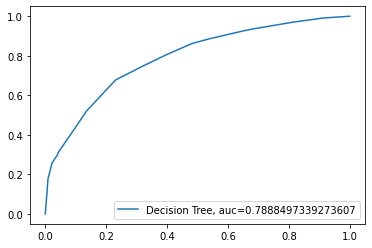

In [ ]:
#ROC AUC graph parameters for Decision Tree model
y_pred_proba = y_preds_proba_DTC
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Conclusion-**
We can conclude that this model is performing well with good roc auc score and accuracy.

# **Evaluating all performed models for comparision**

In [ ]:
#listing all the models for comparision
classifiers = ['Logistic Regression','DECISON TREE','Random Forest','XG Boost']
train_accuracy = [train_accuracy_lr,train_accuracy_DTC,train_accuracy_rf,train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr,test_accuracy_DTC,test_accuracy_rf,test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr,test_precision_DTC,test_precision_score_rf,test_precision_xgb_tuned]
recall_score = [test_recall_score_lr,test_recall_score_DTC,test_recall_score_rf,test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr,test_f1_score_DTC,test_f1_score_rf,test_f1_score_xgb_tuned]

In [ ]:
#evaluation matrix for all models
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.731689,0.730562,0.735279,0.728382,0.731814
1,DECISON TREE,0.722682,0.723299,0.678599,0.745193,0.710339
2,Random Forest,0.997892,0.834836,0.813230,0.849939,0.831179
3,XG Boost,0.949308,0.836651,0.806874,0.857951,0.831629


# Comparing the ROC AUC Curve of all performed models.

In [ ]:
classifiers_proba = [(clf, y_preds_proba_lr),(optimal_DTC_clf,y_preds_proba_DTC),(rf_clf, y_preds_proba_rf),(optimal_xgb, y_preds_proba_xgb)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

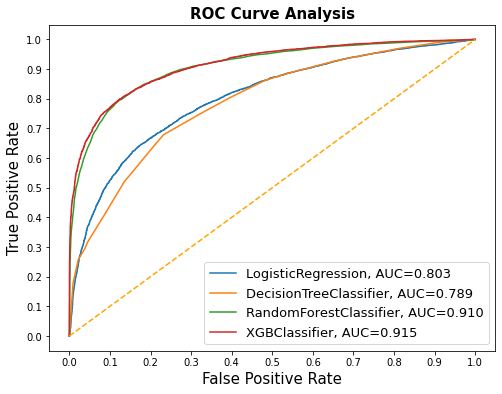

In [ ]:
#ROC-AUC graph parameters for above performed models
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Conclusions:

▶ After performing the various models we get the best accuracy from the
 XGBoost classifier.

  ▶ Random forest is the least accurate as compared to other models
   performed.

  ▶ XG Boost has the best precision and the recall balance.

  ▶ Higher recall can be achieved if low precision is acceptable.

  ▶ We can deploy the model and can be served as an aid to human decision.

  ▶ Model can be improved with more data and computational resources.

  ▶  This model is more than just a predictor of default. The bank (in this    case, Credit Sesame) can take active measures to prevent the customer from defaulting. Some of the most important features for the models are payment history for the past couple of months. What that means is that the bank can use the model predictions (along with the prediction probabilities) a few months in advance to help a customer avoid default.

   ▶ The bank can use this model not just as a predictor but proactively to prevent default. In the process, it can be used to recommend products to customers.

